# IDMS Discplacement data.

(source: http://www.internal-displacement.org/database/displacement-data)

Consists of two datasets:
1. Displacement figures by country
2. Disaster-related new displacements by event

<font color = "red">Currently all paths correspond to my local computer!</font>

<font color = "red">**QUESTIONS**</font>
1. What does **#affected+idps+ind+newdisp+disaster** mean?

In [1]:
import os 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [3]:
import sys
sys.path.append("..")
from ConfigurationClass import Configuration
config = Configuration()
path = config.param["DATA_DIRECTORY"]

FileNotFoundError: [Errno 2] No such file or directory: ''

A diagram with general overview of available datasources is provided below:

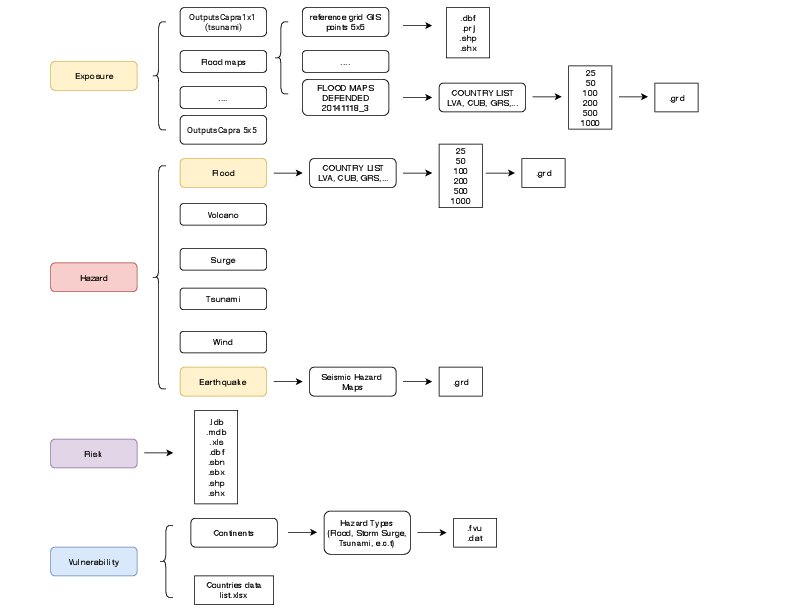

In [6]:
import os

from wand.image import Image as WImage
img = WImage(filename='/Users/sychevaa/Desktop/Hack4Good/GitLabRepository/captain-obvious/data/IDMS_Data_Overview.pdf')
img

**Load the data**

In [2]:
filename_displ_country = "/Users/sychevaa/Desktop/Hack4Good/idmc_displacement_all_dataset.xlsx"
filename_displ_event = "/Users/sychevaa/Desktop/Hack4Good/GitLabRepository/captain-obvious/data/idms_displacement/idmc_disaster_all_dataset.xlsx"

displace_all = pd.read_excel(filename_displ_country, header=[0,1])
disaster_all = pd.read_excel(filename_displ_event, header=[0,1])

## Displacement figures by country

In [13]:
displace_all.head(5)

ISO3          Name       Year       Conflict Stock Displacement  \
  #country+code #country+name #date+year #affected+idps+ind+stock+conflict   
0           AB9    Abyei Area       2014                           20000.0   
1           AB9    Abyei Area       2015                           82000.0   
2           AB9    Abyei Area       2016                           20000.0   
3           AB9    Abyei Area       2017                           31000.0   
4           AB9    Abyei Area       2018                           31000.0   

           Conflict New Displacements          Disaster New Displacements  
  #affected+idps+ind+newdisp+conflict #affected+idps+ind+newdisp+disaster  
0                                 NaN                                 NaN  
1                                 NaN                                 NaN  
2                                 NaN                                 NaN  
3                                 NaN                                 NaN  
4                               150.0                                 2.0

t.b.c.

## Disaster-related new displacements by event

**FIRST SUMMARY**

In [12]:
disaster_all.head(5)

ISO3          Name       Year  Start Date  \
  #country+code #country+name #date+year #date+start   
0           AB9    Abyei Area       2018  2018-07-01   
1           AFG   Afghanistan       2008  2008-01-01   
2           AFG   Afghanistan       2008  2008-08-01   
3           AFG   Afghanistan       2008  2008-04-17   
4           AFG   Afghanistan       2009  2009-01-01   

                  Event Name  Hazard Category          Hazard Type  \
                #description #crisis+category         #crisis+type   
0  Abyie: Flood - 01/07/2018  Weather related                Flood   
1                       None  Weather related  Extreme temperature   
2                       None  Weather related                Flood   
3                       None      Geophysical           Earthquake   
4                       None  Weather related                Flood   

                    New Displacements  
  #affected+idps+ind+newdisp+disaster  
0                                 2.0  
1                                 NaN  
2                               180.0  
3                              3250.0  
4                             25185.0

What period does our data cover?

In [102]:
DataFrame(disaster_all.groupby([('Year', '#date+year')]).count()[('ISO3', '#country+code')])

ISO3
                   #country+code
(Year, #date+year)              
2008                         221
2009                         262
2010                         355
2011                         295
2012                         211
2013                         644
2014                         696
2015                         599
2016                         593
2017                         943
2018                        1612

**Available Information:**

In [10]:
disaster_all.columns.values

array([('ISO3', '#country+code'), ('Name', '#country+name'),
       ('Year', '#date+year'), ('Start Date', '#date+start'),
       ('Event Name', '#description'),
       ('Hazard Category', '#crisis+category'),
       ('Hazard Type', '#crisis+type'),
       ('New Displacements', '#affected+idps+ind+newdisp+disaster')],
      dtype=object)

**Number of observations:**

In [11]:
len(disaster_all)

6431

Delete events without information on the number of displaced people:
(-518)

In [5]:
disaster_all_filt1 = disaster_all.loc[disaster_all[('New Displacements', '#affected+idps+ind+newdisp+disaster')].isnull()==False ]
msg = "Excluded {} events".format(len(disaster_all) - len(disaster_all_filt1))
print(msg)

Excluded 581 events


**GROUP BY EVENT TYPE**

In [27]:
disaster_all_filt1[('Hazard Type', '#crisis+type')] = list(map(lambda x: str(x).title(), disaster_all_filt1[('Hazard Type', '#crisis+type')] ))
disaster_event_group = disaster_all_filt1.groupby([('Hazard Type', '#crisis+type')])

/Users/sychevaa/anaconda3/envs/climada_env/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


**Q1:** What kind of hazard types are present?

In [76]:
q1 = DataFrame(disaster_event_group.count()[('Hazard Category', '#crisis+category')].sort_values())
q1.head(10)

Hazard Category
                            #crisis+category
(Hazard Type, #crisis+type)                 
None                                       0
Severe Winter Condition                    1
Drought                                   13
Volcanic Activity                         13
Mass Movement                             30
Extreme Temperature                       44
Volcanic Eruption                         62
Dry Mass Movement                         93
Earthquake                               277
Wet Mass Movement                        474

**Q2:** What type of events results in largest displacement?

In [104]:
DataFrame(disaster_event_group.agg(np.max)['Year']).sort_values(by = 'Year',ascending=False)#.columns.values#['Year'] # WHY YEAR ?

Year
(Hazard Type, #crisis+type)            
Flood                        15200000.0
Earthquake                   15000000.0
Storm                         4095280.0
Drought                        891857.0
Extreme Temperature            827000.0
Wet Mass Movement              400000.0
Volcanic Eruption              360557.0
Wildfire                       203700.0
Dry Mass Movement               26093.0
Volcanic Activity               13304.0
Mass Movement                    3600.0
Severe Winter Condition           807.0
None                              630.0

**Q3:** What is the average displacement per event type?

In [105]:
q3 = disaster_event_group.mean()[[('New Displacements', '#affected+idps+ind+newdisp+disaster')]].sort_values(by = ('New Displacements', '#affected+idps+ind+newdisp+disaster'),ascending=False) 
q3.head(10)

New Displacements
                            #affected+idps+ind+newdisp+disaster
(Hazard Type, #crisis+type)                                    
Drought                                           157218.000000
Earthquake                                        117178.722022
Storm                                              60733.343274
Flood                                              47537.920354
Extreme Temperature                                24391.772727
Volcanic Eruption                                  19100.967742
Wildfire                                            3190.583004
Volcanic Activity                                   2491.846154
Wet Mass Movement                                   1881.675105
Dry Mass Movement                                    893.634409

**GROUP BY COUNTRY**

In [68]:
disaster_country_group = disaster_all_filt1.groupby([('Name', '#country+name')])

array([('ISO3', '#country+code'), ('Name', '#country+name'),
       ('Year', '#date+year'), ('Start Date', '#date+start'),
       ('Event Name', '#description'),
       ('Hazard Category', '#crisis+category'),
       ('Hazard Type', '#crisis+type'),
       ('New Displacements', '#affected+idps+ind+newdisp+disaster')],
      dtype=object)

**Q4:** What country has the highest number of events?

In [72]:
q6 = DataFrame(disaster_country_group.count()[('Hazard Type', '#crisis+type')].sort_values(ascending=False))
q6.head(10)

Hazard Type
                      #crisis+type
(Name, #country+name)             
Indonesia                      766
United States                  430
Colombia                       416
China                          369
Philippines                    209
Nepal                          173
Afghanistan                    159
Malaysia                       150
Myanmar                        130
Sri Lanka                      124

**Q5** What country has the largest number of displaced people?

In [84]:
#q5 = DataFrame(disaster_country_group.sum()[('Hazard Type', '#crisis+type')].sort_values(ascending=False))
q5 = DataFrame(disaster_country_group.sum()[('New Displacements', '#affected+idps+ind+newdisp+disaster')].sort_values(ascending=False)) #[('Hazard Type', '#crisis+type')]

q5.head(10)

New Displacements
                      #affected+idps+ind+newdisp+disaster
(Name, #country+name)                                    
China                                          77638588.0
India                                          39639411.0
Philippines                                    39469642.0
Pakistan                                       15586239.0
Nigeria                                         7851769.0
United States                                   7300190.0
Bangladesh                                      6894681.0
Cuba                                            5953344.0
Indonesia                                       5634894.0
Myanmar                                         5526496.0

**GROUP BY COUNTRY AND EVENT TYPE**

In [96]:
pd.pivot_table(disaster_all_filt1,
               values = [('New Displacements', '#affected+idps+ind+newdisp+disaster')],
               index=[('Name', '#country+name'), ('Hazard Type', '#crisis+type')],
             aggfunc=np.sum)

New Displacements
                                                  #affected+idps+ind+newdisp+disaster
(Name, #country+name) (Hazard Type, #crisis+type)                                    
Abyei Area            Flood                                                       2.0
Afghanistan           Drought                                                371318.0
                      Dry Mass Movement                                         407.0
                      Earthquake                                              77579.0
                      Extreme Temperature                                      4369.0
                      Flood                                                  232092.0
                      Storm                                                     284.0
                      Wet Mass Movement                                       18291.0
Albania               Earthquake                                                150.0
                      Flood                                                   10755.0
                      Wet Mass Movement                                         581.0
Algeria               Earthquake                                               4492.0
                      Flood                                                   49271.0
American Samoa        Storm                                                    4600.0
Angola                Flood                                                  447337.0
                      Storm                                                    3640.0
Anguilla              Storm                                                     500.0
Antigua and Barbuda   Storm                                                    1468.0
Argentina             Earthquake                                                 48.0
                      Flood                                                  120889.0
                      Storm                                                    8750.0
                      Volcanic Eruption                                         600.0
                      Wet Mass Movement                                        2220.0
                      Wildfire                                                  199.0
Australia             Flood                                                   21189.0
                      Storm                                                   53224.0
                      Wet Mass Movement                                           3.0
                      Wildfire                                                26125.0
Austria               Extreme Temperature                                        25.0
                      Flood                                                    1066.0
...                                                                               ...
Vanuatu               Earthquake                                                 11.0
                      Flood                                                     200.0
                      Storm                                                   69739.0
                      Volcanic Eruption                                       23159.0
                      Wet Mass Movement                                         640.0
Venezuela             Flood                                                   33783.0
Venezuela, RB         Flood                                                  153088.0
Viet Nam              Flood                                                   48159.0
                      Storm                                                  728206.0
                      Wet Mass Movement                                         145.0
Vietnam               Flood                                                  474793.0
                      Storm                                                 1702922.0
Virgin Islands        Storm                                                    2311.0
West Bank and Gaza    Extr

**WHAT ARE THE NAME OF THE EVENTS?**

**Q6:** for how many events we do not know event names? - (705)

In [8]:
val1 = sum(disaster_all_filt1[('Event Name', '#description')].isnull())
val2 = sum(disaster_all_filt1[('Event Name', '#description')].isnull()==False)
msg = "For records {} no event name\nRemains: {}".format(val1, val2)
print(msg)

For records 705 no event name
Remains: 5145


**Q9:** Do we have only 1 entry for every event? - **No**

Why?
1. One event spans several countries
2. Error/data inconsistency
3. Duplicate entries

<font color="red">need to explore further</font>

In [111]:
len1 = len(np.unique(disaster_all_filt1[('Event Name', '#description')].dropna()))
len2 = len(disaster_all_filt1[('Event Name', '#description')].dropna())
assert len1==len2, "{} != {}".format(len1, len2)

AssertionError: 4858 != 5145